In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.导入数据, 数据清理, 预处理(import, clean, pre=procession)

In [2]:
redWine = pd.read_csv("winequality-white.csv", delimiter=";") 
redWine.columns = redWine.columns.str.replace(" ","_")
redWine.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
whiteWine = pd.read_csv("winequality-white.csv", delimiter=";")
whiteWine.columns = whiteWine.columns.str.replace(" ","_")
whiteWine.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
redWine.info()
redWine.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:

whiteWine.info()
whiteWine.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

2. 基本特征(质量分布, ), 粗略的属性-质量相关性(皮尔森相关系数),  

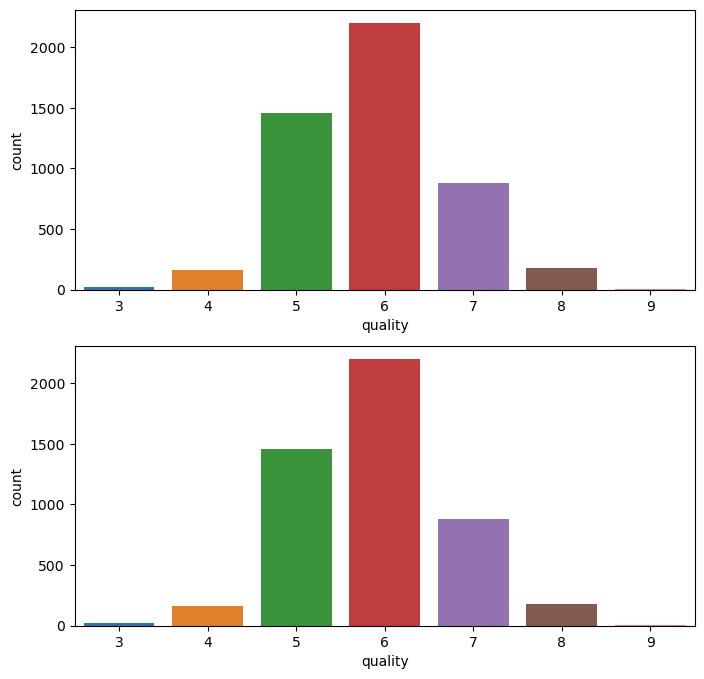

In [6]:
figQ, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 8))

sns.countplot(redWine['quality'], ax = ax1)
sns.countplot(whiteWine['quality'], ax = ax2)
plt.show()

Q1. Which variable(s) is (are) the most influential one(s) to the quality of the red/white wine?
Q3. Are the influential variables of the red wine the same as those of the white wine?

0.4355747154613688


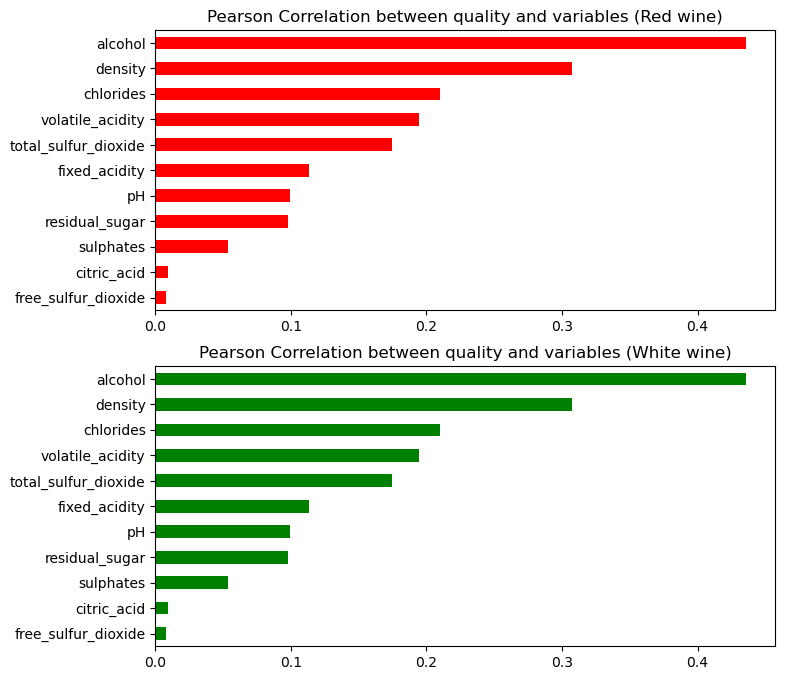

In [7]:
figQCorr, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 8))
redQcorr = abs(redWine.corr(method='pearson')[
               'quality']).sort_values(ascending=True)[:-1]
whiteQcorr = abs(whiteWine.corr(method ='pearson')['quality']).sort_values(ascending=True)[:-1]
print(redQcorr['alcohol'])

redQcorr.plot(kind='barh', ax=ax1, title='Pearson Correlation between quality and variables (Red wine)', color='red')
whiteQcorr.plot(kind='barh', ax=ax2, title='Pearson Correlation between quality and variables (White wine)', color='green')
#TODO: Export the Quality Corrilation->Slope plot


Q2. Are there any correlations between different variables?

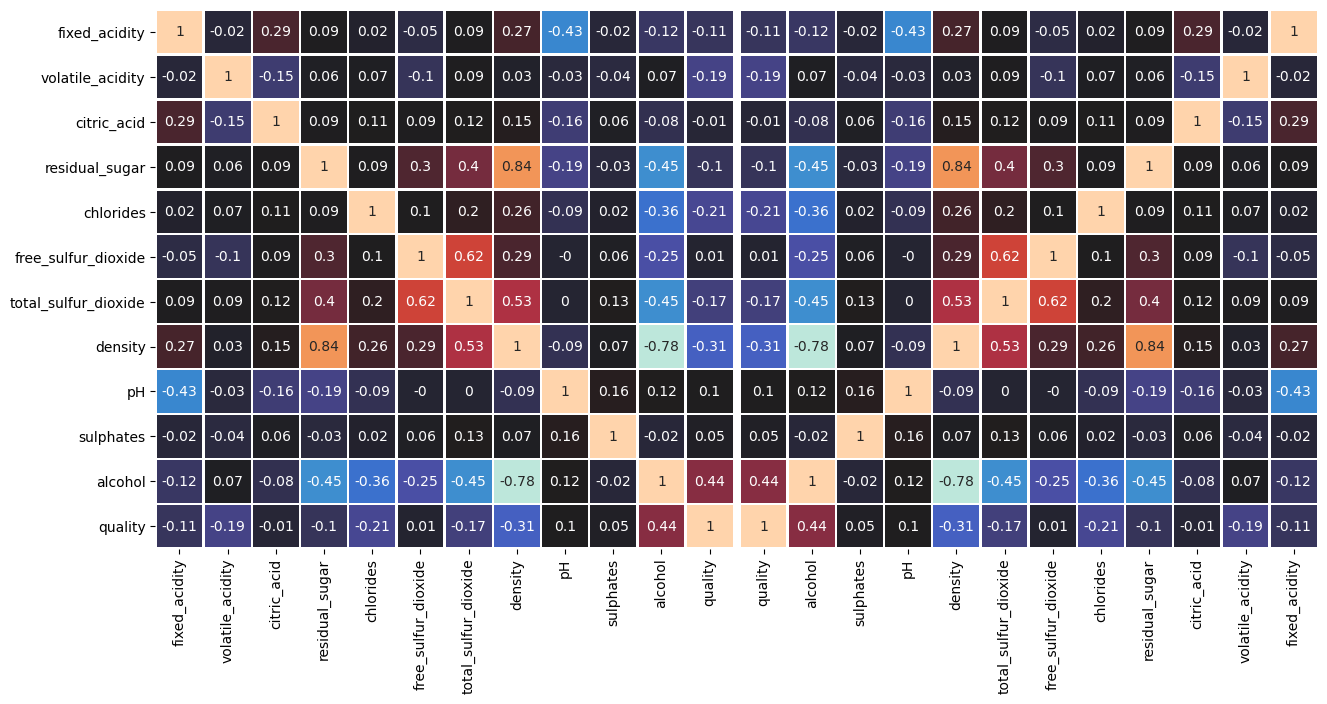

In [8]:
#Correlation 2
redCorr = redWine.corr(method ='pearson')
whiteCorr = whiteWine.corr(method='pearson')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.subplots_adjust(wspace=0.01)

sns.heatmap(redCorr.round(2), cmap="icefire", linewidths=1, ax=ax1, cbar=False, annot=True)
sns.heatmap(whiteCorr.round(2), cmap="icefire", linewidths=1, ax=ax2, cbar=False, annot=True)
ax2.set_yticks([])
ax2.invert_xaxis()
plt.show()



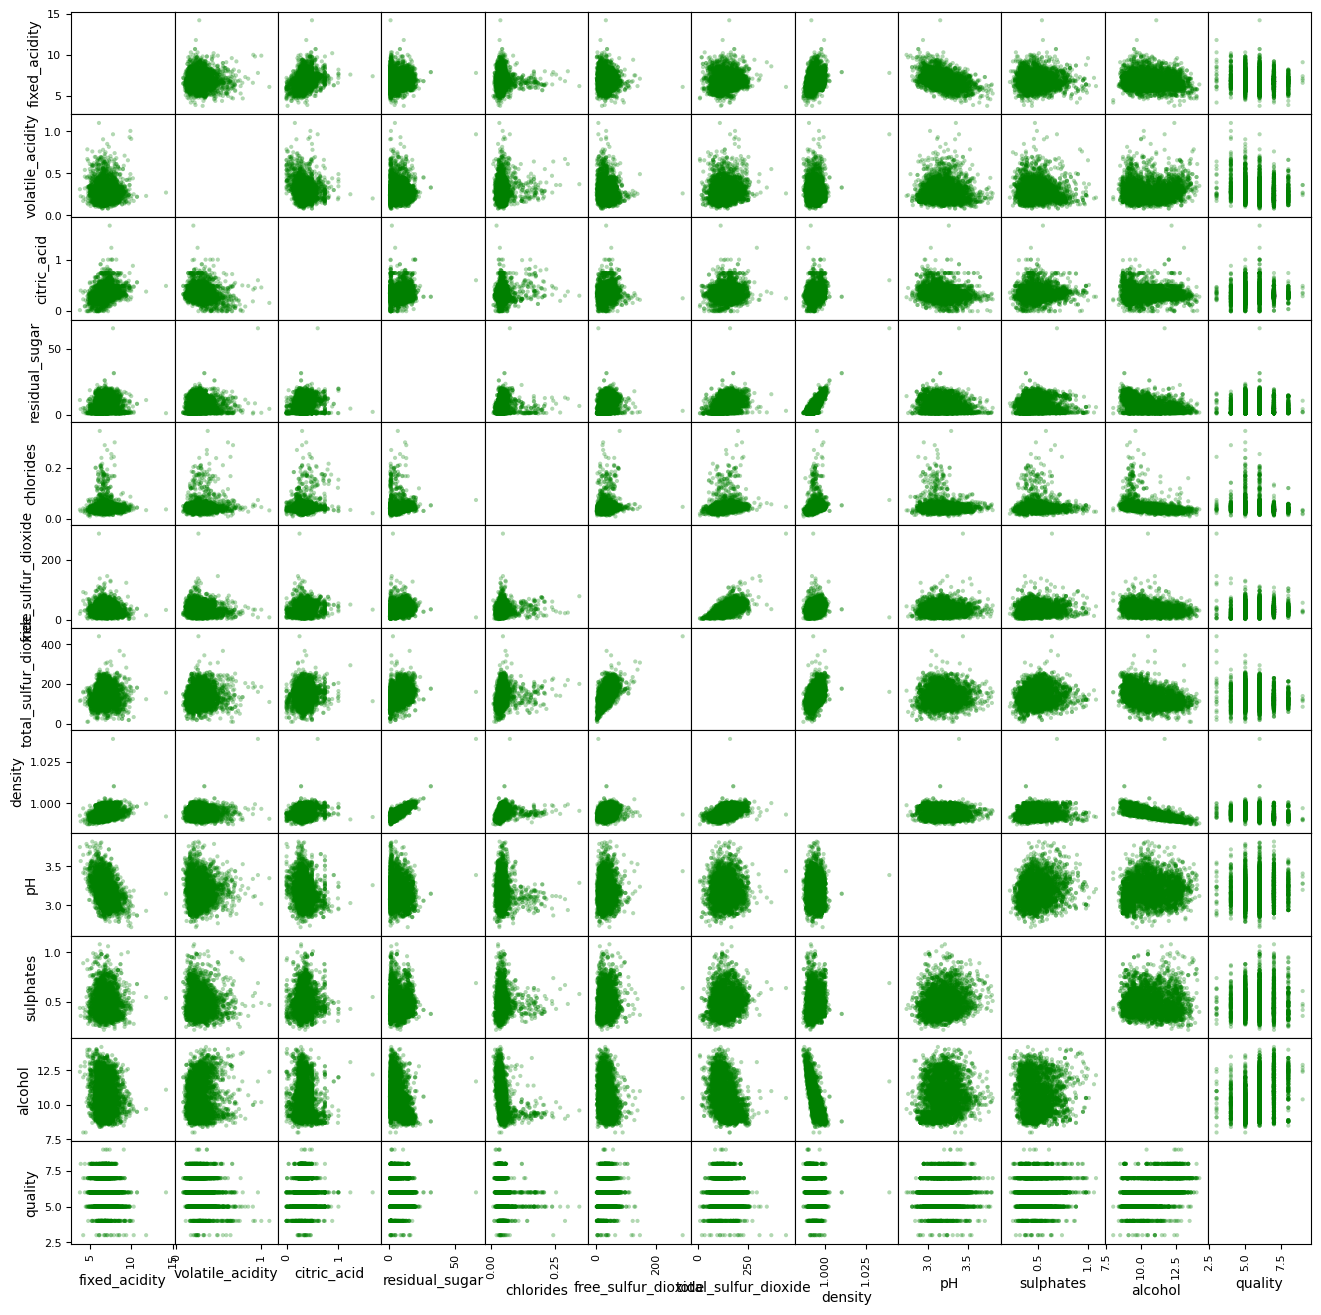

In [9]:
fig2 = pd.plotting.scatter_matrix(redWine, figsize=(16, 16), diagonal='', alpha = 0.3, range_padding=0.2, color='green')


Q1. 对质量影响最大的属性: 分别列出红/白葡萄酒的影响属性, 给出置信度
Q2. 属性间关联: A. 化学上, 酸-pH直接联系, B. Heatmap结果显示
Q3. 

A4-1 决策树预测

In [10]:
redWine.columns


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

[1,2,3,4,5]: Level 0 (Bad);
[6]: Level 1 (Normal);
[7,8,9]: Level 2 (Good);

In [11]:
xRed = redWine.iloc[:,:-2]
qualityLevel = []
for q in redWine['quality']:
    if q<=5:
        qualityLevel.append(0)
    elif q==6:
        qualityLevel.append(1)
    elif q<=10:
        qualityLevel.append(2)
redWine['qualityLevel']=qualityLevel
yRed = redWine['qualityLevel']
xRed.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40


In [12]:
from collections import Counter
Counter(yRed)


Counter({1: 2198, 0: 1640, 2: 1060})

In [13]:
import sklearn

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xRed = sc.fit_transform(xRed)

In [15]:
xRed

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
         2.33151201e+00, -1.24692128e+00, -3.49184257e-01],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
        -9.15417164e-03,  7.40028640e-01,  1.34184656e-03],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         3.58664800e-01,  4.75101984e-01, -4.36815783e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -4.97350262e-01, -1.31315295e+00, -2.61552731e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
        -1.78471666e+00,  1.00495530e+00, -9.62604939e-01],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
        -1.54396243e+00,  4.75101984e-01, -1.48839409e+00]])

In [16]:
from sklearn.model_selection import train_test_split
xRedTrain, xRedTest, yRedTrain, yRedTest = train_test_split(xRed, yRed, test_size = 0.3)


A4.1-DecisionTreeClassifier

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

dtRed = DecisionTreeClassifier(class_weight='balanced',max_depth=15)
dtRed.fit(xRedTrain, yRedTrain)
dtRedPredict = dtRed.predict(xRedTest)

dtRedConfMatrix = confusion_matrix(yRedTest, dtRedPredict)
dtRedAccScore = accuracy_score(yRedTest, dtRedPredict)
print(dtRedConfMatrix)
print(dtRedAccScore)


[[314 131  38]
 [154 421 103]
 [ 21  90 198]]
0.6346938775510204


A4.2-Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegressionCV

lrRed = LogisticRegressionCV(Cs=5,penalty='l2',
                             class_weight='balanced', multi_class='multinomial')
lrRed.fit(xRedTrain, yRedTrain)
lrRedPredict = lrRed.predict(xRedTest)

lrRedConfMatrix = confusion_matrix(yRedTest, lrRedPredict)
lrRedAccScore = accuracy_score(yRedTest, lrRedPredict)
print(lrRedConfMatrix)
print(lrRedAccScore)


[[331 106  46]
 [208 235 235]
 [ 39  55 215]]
0.5312925170068027


A4.3-RandomForestClassifier

In [19]:
# from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
RFRed = RandomForestClassifier(
    class_weight='balanced', criterion='entropy')
RFRed.fit(xRedTrain, yRedTrain)
RFRedPredict = RFRed.predict(xRedTest)

RFRedConfMatrix = confusion_matrix(yRedTest, RFRedPredict)
RFRedAccScore = accuracy_score(yRedTest, RFRedPredict)
print(RFRedConfMatrix)
print(RFRedAccScore)


[[332 146   5]
 [109 509  60]
 [ 10 118 181]]
0.6952380952380952


A4.4-SVM

In [20]:
from sklearn.svm import SVC
SVMRed = SVC(C=1.2, gamma=5, class_weight='balanced')
SVMRed.fit(xRedTrain, yRedTrain)
SVMRedPredict = SVMRed.predict(xRedTest)

SVMRedConfMatrix = confusion_matrix(yRedTest, SVMRedPredict)
SVMRedAccScore = accuracy_score(yRedTest, SVMRedPredict)
print(SVMRedConfMatrix)
print(SVMRedAccScore)


[[164 319   0]
 [  9 665   4]
 [  0 203 106]]
0.6360544217687075


A4.5-ExtraTreesClassifier

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
ETRed = ExtraTreesClassifier(
    class_weight='balanced', criterion='entropy')
ETRed.fit(xRedTrain, yRedTrain)
ETRedPredict = ETRed.predict(xRedTest)

ETRedConfMatrix = confusion_matrix(yRedTest, ETRedPredict)
ETRedAccScore = accuracy_score(yRedTest, ETRedPredict)
print(ETRedConfMatrix)
print(ETRedAccScore)


[[339 137   7]
 [105 517  56]
 [  8 122 179]]
0.7040816326530612


A4.6-ML

In [22]:
from sklearn.neural_network import MLPClassifier
MLRed = MLPClassifier(hidden_layer_sizes=(10,))
MLRed.fit(xRedTrain, yRedTrain)
MLRedPredict = MLRed.predict(xRedTest)

MLRedConfMatrix = confusion_matrix(yRedTest, MLRedPredict)
MLRedAccScore = accuracy_score(yRedTest, MLRedPredict)
print(MLRedConfMatrix)
print(MLRedAccScore)


[[305 173   5]
 [177 421  80]
 [ 13 169 127]]
0.5802721088435374


c:\Users\n0t1u\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
redWine['qualityLevel'].value_counts(normalize=True)


1    0.448755
0    0.334831
2    0.216415
Name: qualityLevel, dtype: float64

Text(0.5, 1.0, 'Models and accuracies in predicting white wine quality')

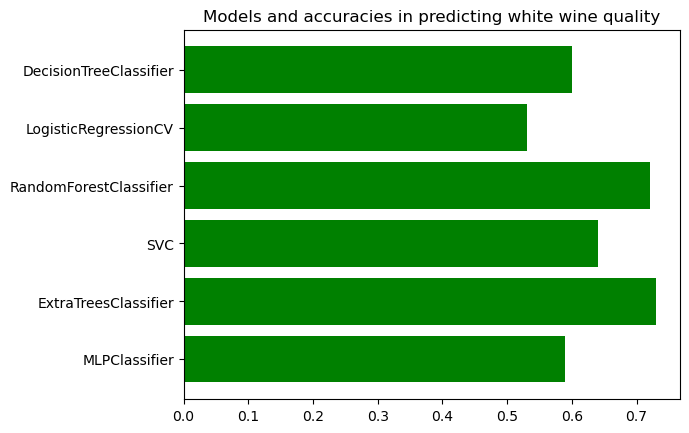

In [24]:
scores = [0.59, 0.73, 0.64, 0.72, 0.53, 0.60]
models = ['MLPClassifier', 'ExtraTreesClassifier',
          'SVC', 'RandomForestClassifier', 'LogisticRegressionCV', 'DecisionTreeClassifier']
plt.barh(models, scores, color='green')
plt.title('Models and accuracies in predicting white wine quality')
